# Automating API Extraction + Appending Data Formatting Data + Data Visualization

In [1]:
import os
import sys
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import sleep

# Define the columns explicitly to ensure consistency
columns = [
    'id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
    'tags', 'max_supply', 'circulating_supply', 'total_supply',
    'platform', 'cmc_rank', 'last_updated', 'quote.USD.price',
    'quote.USD.volume_24h', 'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
    'quote.USD.market_cap', 'quote.USD.last_updated', 'timestamp'
]

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '1d18324e-00d5-486a-8001-91689ddf7d0f',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)

        if response.status_code == 200:
            data = response.json()

            # Comment the below line when running api_runner() in the for loop below --
            # print(json.dumps(data, indent=4))  
        else:
            print("Failed to retrieve data")
            print(response.text)

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return

    # Use this if you just want to keep it in a dataframe --
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df2 = df2.reindex(columns=columns)  # Ensure consistent columns

    # Use this if you just want to put it in a csv --
    file_path = r'F:\Data Analyst Bootcamp\Python\Mini-projects\Automating Crypto Website API Pull\API-data.csv'
    try:
        if not os.path.isfile(file_path):
            df2.to_csv(file_path, index=False, header=True)
        else:
            df2.to_csv(file_path, mode='a', index=False, header=False)
    except PermissionError as e:
        print(f"PermissionError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

    # If you want to read the CSV here in a dataframe --
    # Uncomment the lines below to use the data as a dataframe
    # df = pd.concat([df, df2], ignore_index=True)
    # df

# For testing purpose, call the function in a loop
for i in range(3):
    api_runner()
    print('API Runner ran successfully!')
    sleep(10)

sys.exit()


API Runner ran successfully!
API Runner ran successfully!
API Runner ran successfully!


SystemExit: 

C:\Users\Benecia\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import pandas as pd
df72 = pd.read_csv(r'F:\Data Analyst Bootcamp\Python\Mini-projects\Automating Crypto Website API Pull\API-data.csv')

# One thing I noticed was the scientific notation. I want to be able to see the numbers in this case --
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df72.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.last_updated,timestamp
0,1,Bitcoin,BTC,bitcoin,11134,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19716356.00000,19716356.00000,...,1,2024-06-25T06:03:00.000Z,60982.79863,42538416937.00000,-0.57987,-2.07535,-7.09956,1202360000000.00000,2024-06-25T06:03:00.000Z,34:59.8
1,1027,Ethereum,ETH,ethereum,9081,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120154099.20000,120154099.20000,...,2,2024-06-25T06:03:00.000Z,3370.48218,22072004193.00000,-0.55048,0.11518,-2.20294,404977000000.00000,2024-06-25T06:03:00.000Z,34:59.8
2,825,Tether USDt,USDT,tether,89433,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112934000000.00000,116077000000.00000,...,3,2024-06-25T06:03:00.000Z,0.99946,74383788045.00000,-0.00183,-0.01870,-0.04482,112874000000.00000,2024-06-25T06:03:00.000Z,34:59.8
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147583525.30000,147583525.30000,...,4,2024-06-25T06:03:00.000Z,571.91204,1984211515.00000,-0.54637,1.09889,-3.90246,84404794330.00000,2024-06-25T06:03:00.000Z,34:59.8
4,5426,Solana,SOL,solana,691,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,462134207.40000,578767986.10000,...,5,2024-06-25T06:03:00.000Z,135.64628,3414034608.00000,-0.48492,9.30971,-0.70142,62686786151.00000,2024-06-25T06:03:00.000Z,34:59.8


In [3]:
# Now let's look at the coin trends over time

df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
Bitcoin,-0.34397,-1.96793,-6.94169
Ethereum,-0.46089,0.00897,-2.13516
Tether USDt,-0.00746,0.01317,-0.03338
BNB,-0.45967,0.76103,-3.80929
Solana,-0.55474,8.97261,-0.56210
USDC,-0.00739,0.00237,0.00072
XRP,-0.46952,0.96011,-3.31015
Toncoin,-0.02596,5.12882,1.98962
Dogecoin,-0.71915,3.20698,0.51044


In [4]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h    -0.34397
             quote.USD.percent_change_24h   -1.96793
             quote.USD.percent_change_7d    -6.94169
Ethereum     quote.USD.percent_change_1h    -0.46089
             quote.USD.percent_change_24h    0.00897
             quote.USD.percent_change_7d    -2.13516
Tether USDt  quote.USD.percent_change_1h    -0.00746
             quote.USD.percent_change_24h    0.01317
             quote.USD.percent_change_7d    -0.03338
BNB          quote.USD.percent_change_1h    -0.45967
             quote.USD.percent_change_24h    0.76103
             quote.USD.percent_change_7d    -3.80929
Solana       quote.USD.percent_change_1h    -0.55474
             quote.USD.percent_change_24h    8.97261
             quote.USD.percent_change_7d    -0.56210
USDC         quote.USD.percent_change_1h    -0.00739
             quote.USD.percent_change_24h    0.00237
             quote.USD.percent_change_7d     0.00072
XRP 

In [5]:
type(df4)

pandas.core.series.Series

In [6]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h  -0.34397
            quote.USD.percent_change_24h -1.96793
            quote.USD.percent_change_7d  -6.94169
Ethereum    quote.USD.percent_change_1h  -0.46089
            quote.USD.percent_change_24h  0.00897
            quote.USD.percent_change_7d  -2.13516
Tether USDt quote.USD.percent_change_1h  -0.00746
            quote.USD.percent_change_24h  0.01317
            quote.USD.percent_change_7d  -0.03338
BNB         quote.USD.percent_change_1h  -0.45967
            quote.USD.percent_change_24h  0.76103
            quote.USD.percent_change_7d  -3.80929
Solana      quote.USD.percent_change_1h  -0.55474
            quote.USD.percent_change_24h  8.97261
            quote.USD.percent_change_7d  -0.56210
USDC        quote.USD.percent_change_1h  -0.00739
            quote.USD.percent_change_24h  0.00237
            quote.USD.percent_change_7d   0.00072
XRP         quote.USD.percent_change_1h  -0.46952
            quote.USD.percent_change_24h  0.96011
            quote.USD.percent_change_7d  -3.31015
Toncoin     quote.USD.percent_change_1h  -0.02596
            quote.USD.percent_change_24h  5.12882
            quote.USD.percent_change_7d   1.98962
Dogecoin    quote.USD.percent_change_1h  -0.71915
            quote.USD.percent_change_24h  3.20698
            quote.USD.percent_change_7d   0.51044
Cardano     quote.USD.percent_change_1h   0.09690
            quote.USD.percent_change_24h  4.18051
            quote.USD.percent_change_7d   2.16555
TRON        quote.USD.percent_change_1h   0.33670
            quote.USD.percent_change_24h  1.88062
            quote.USD.percent_change_7d   5.10912
Shiba Inu   quote.USD.percent_change_1h  -1.01379
            quote.USD.percent_change_24h  1.90777
            quote.USD.percent_change_7d  -4.93611
Avalanche   quote.USD.percent_change_1h  -0.46881
            quote.USD.percent_change_24h  3.27086
            quote.USD.percent_change_7d  -5.80020
Chainlink   quote.USD.percent_change_1h  -0.52649
            quote.USD.percent_change_24h  7.60253
            quote.USD.percent_change_7d   2.02281
Polkadot    quote.USD.percent_change_1h  -0.11749
            quote.USD.percent_change_24h  3.48845
            quote.USD.percent_change_7d  -0.15696

In [7]:
df5.count()

values    45
dtype: int64

In [8]:
# I don't want name to be the index so I'm adding additional external index --
num_rows = len(df5)
index = pd.Index(range(num_rows))

# Set the above DataFrame index object as the index --
df6 = df5.set_index(index)
df6

,values
0,-0.34397
1,-1.96793
2,-6.94169
3,-0.46089
4,0.00897
5,-2.13516
6,-0.00746
7,0.01317
8,-0.03338
9,-0.45967


In [9]:
# If it only has the index and values try doing reset_index --
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.34397
1,Bitcoin,quote.USD.percent_change_24h,-1.96793
2,Bitcoin,quote.USD.percent_change_7d,-6.94169
3,Ethereum,quote.USD.percent_change_1h,-0.46089
4,Ethereum,quote.USD.percent_change_24h,0.00897
5,Ethereum,quote.USD.percent_change_7d,-2.13516
6,Tether USDt,quote.USD.percent_change_1h,-0.00746
7,Tether USDt,quote.USD.percent_change_24h,0.01317
8,Tether USDt,quote.USD.percent_change_7d,-0.03338
9,BNB,quote.USD.percent_change_1h,-0.45967


In [10]:
# Change the column name --
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.34397
1,Bitcoin,quote.USD.percent_change_24h,-1.96793
2,Bitcoin,quote.USD.percent_change_7d,-6.94169
3,Ethereum,quote.USD.percent_change_1h,-0.46089
4,Ethereum,quote.USD.percent_change_24h,0.00897
5,Ethereum,quote.USD.percent_change_7d,-2.13516
6,Tether USDt,quote.USD.percent_change_1h,-0.00746
7,Tether USDt,quote.USD.percent_change_24h,0.01317
8,Tether USDt,quote.USD.percent_change_7d,-0.03338
9,BNB,quote.USD.percent_change_1h,-0.45967


In [11]:
df7['percent_change'] = df7['percent_change'].replace({
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
})

df7

,name,percent_change,values
0,Bitcoin,1h,-0.34397
1,Bitcoin,24h,-1.96793
2,Bitcoin,7d,-6.94169
3,Ethereum,1h,-0.46089
4,Ethereum,24h,0.00897
5,Ethereum,7d,-2.13516
6,Tether USDt,1h,-0.00746
7,Tether USDt,24h,0.01317
8,Tether USDt,7d,-0.03338
9,BNB,1h,-0.45967


In [12]:
import seaborn as sns

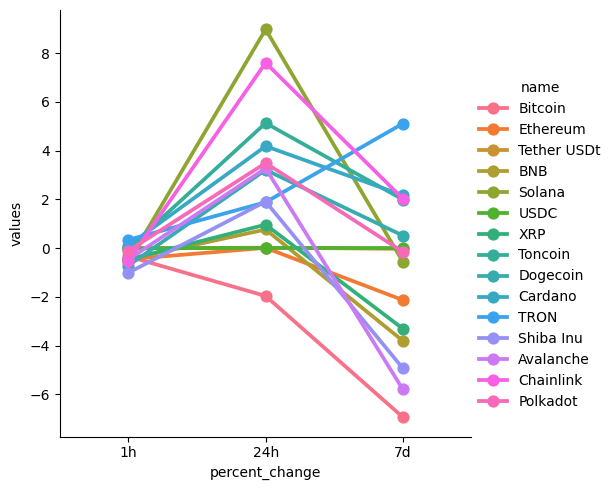

In [13]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [14]:
# Now to do something much simpler, we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60982.79863,34:59.8
15,Bitcoin,60982.79863,35:10.2
30,Bitcoin,60982.79863,35:20.9
45,Bitcoin,60983.46403,42:00.1
60,Bitcoin,60983.46403,42:10.5
75,Bitcoin,60983.46403,42:20.9
90,Bitcoin,61101.81834,2024-06-25 12:05:17.512431
105,Bitcoin,61101.81834,2024-06-25 12:05:28.055331
120,Bitcoin,61101.81834,2024-06-25 12:05:38.861808
135,Bitcoin,61150.23645,2024-06-25 12:12:17.564599


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

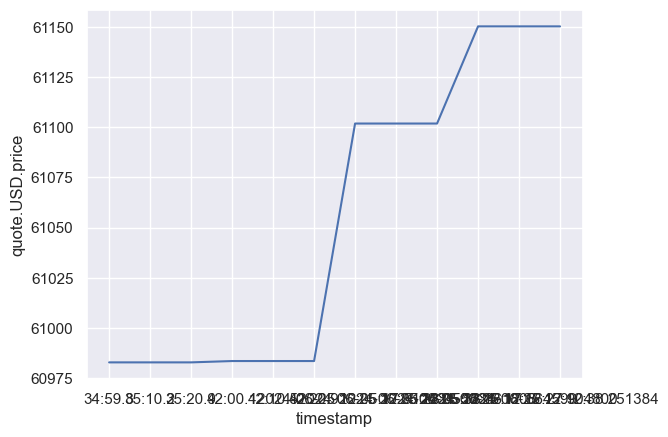

In [15]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)